# Keras Simple autopilot Demo

In [71]:
# needed for matplotlib in jupyter notebook
%matplotlib inline

# import required modules
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import pandas as pd
import os
from ipyfilechooser import FileChooser


In [75]:
fc = FileChooser()
display(fc)


FileChooser(path='/home/daan/bitofpepper/ai_robot_new/ai_robot/notebooks', filename='', title='', show_hidden=…

In [123]:
# prepare data
data = pd.read_csv(os.path.join('..', 'simulator', 'logs', fc.selected))
label_movement = data.columns[0]
print(label_movement)


stop


Text(0, 0.5, 'Count')

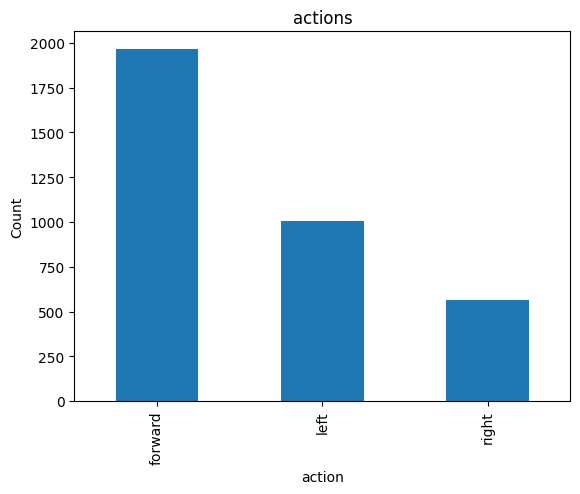

In [124]:
label_movement = data.columns[0]
data = data[data[label_movement] != 'stop']
data_random_forward = data[data[label_movement] == 'forward'].sample(n=int(data.shape[0]/2))
data.drop(data_random_forward.index,inplace=True)
data[label_movement].value_counts().plot(kind='bar')
plt.title('actions')
plt.xlabel('action')
plt.ylabel('Count')

In [125]:
# split into training and test data (10% test data)
data_test = data.sample(n=int(data.shape[0]/10))
data.drop(data_test.index,inplace=True)

#labels

conv_labels = [0 if values == 'forward' else values for values in data[label_movement] ]
conv_labels = [1 if values == 'left' else values for values in conv_labels ]
conv_labels = [2 if values == 'right' else values for values in conv_labels ]

labels = conv_labels

#labels test 
conv_labels = [0 if values == 'forward' else values for values in data_test[label_movement] ]
conv_labels = [1 if values == 'left' else values for values in conv_labels ]
conv_labels = [2 if values == 'right' else values for values in conv_labels ]

labels_test = conv_labels
print(len(labels_test))
print(len(labels))

353
3185


In [126]:
# convert image data
train = data.drop([ label_movement],axis=1).values
test = data_test.drop(label_movement,axis=1).values

train = train.reshape(train.shape[0],20,20,3)
test = test.reshape(test.shape[0],20,20,3)

## Data preparation

In [127]:
# create a smaller test set

x_train = train.astype('float32') / 255
x_test = test.astype('float32') / 255

# convert classes to one-hot encoding
num_classes = 3
y_train = keras.utils.to_categorical(labels, num_classes)
y_test = keras.utils.to_categorical(labels_test, num_classes)
print("one-hot labels:\n", y_train[:3])


one-hot labels:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## Training

In [128]:
# create model
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(20, 20, 3)),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 18, 18, 32)        896       
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 8, 8, 128)         0         
                                                                 
 flatten_11 (Flatten)        (None, 8192)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               1048704   
                                                     

In [129]:
# fit model to training data
model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
80/80 [==============================] - 3s 27ms/step - loss: 0.9562 - accuracy: 0.5522 - val_loss: 0.9892 - val_accuracy: 0.4662
Epoch 2/10
80/80 [==============================] - 2s 24ms/step - loss: 0.8614 - accuracy: 0.5934 - val_loss: 0.9856 - val_accuracy: 0.5086
Epoch 3/10
80/80 [==============================] - 2s 25ms/step - loss: 0.8364 - accuracy: 0.6056 - val_loss: 1.0562 - val_accuracy: 0.4819
Epoch 4/10
80/80 [==============================] - 2s 27ms/step - loss: 0.7972 - accuracy: 0.6323 - val_loss: 0.9543 - val_accuracy: 0.5243
Epoch 5/10
80/80 [==============================] - 2s 24ms/step - loss: 0.7493 - accuracy: 0.6503 - val_loss: 1.0071 - val_accuracy: 0.5118
Epoch 6/10
80/80 [==============================] - 2s 26ms/step - loss: 0.7151 - accuracy: 0.6805 - val_loss: 0.9750 - val_accuracy: 0.5557
Epoch 7/10
80/80 [==============================] - 2s 31ms/step - loss: 0.6594 - accuracy: 0.7084 - val_loss: 0.9989 - val_accuracy: 0.5243
Epoch 8/10
80

## Evaluation

In [121]:
# evaluate model
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score)

6/6 [==============================] - 0s 7ms/step - loss: 0.8906 - accuracy: 0.5864
Test accuracy: [0.8906375169754028, 0.5863874554634094]


In [122]:
model.save(os.path.join('..', 'models', 'my-keras-model.keras'))